In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the data
customer_address = pd.read_excel("E:/Omar's Stuff/College related/Virtual DataAnalysis Camp/Task One/Datasets/Datasets Cleaned/CustomerAddress.xlsx")
customer_demographic = pd.read_excel("E:/Omar's Stuff/College related/Virtual DataAnalysis Camp/Task One/Datasets/Datasets Cleaned/CustomerDemographic.xlsx")
new_customer_list = pd.read_excel("E:/Omar's Stuff/College related/Virtual DataAnalysis Camp/Task One/Datasets/Datasets Cleaned/NewCustomerList.xlsx")
transactions = pd.read_excel("E:/Omar's Stuff/College related/Virtual DataAnalysis Camp/Task One/Datasets/Datasets Cleaned/Transactions.xlsx")

### Data Exploration

"in this part I will try to find some relationships between the datasets' attributes"

In [3]:
customer_address.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
customer_address.set_index('customer_id', inplace = True)

In [5]:
customer_demographic.drop('Unnamed: 0', inplace = True, axis = 1)

In [6]:
customer_demographic.set_index('customer_id', inplace = True)

In [7]:
new_customer_list.drop('Unnamed: 0', inplace = True, axis = 1)

In [8]:
transactions.drop('Unnamed: 0', inplace = True, axis = 1)

####  in the past few lines of code I have removed the 'unnamed : 0' column from the data as it has no use and it represents noise, and also in the customer address and the customer demographic dataframes I have set the customer id to be the index.

In [9]:
from datetime import datetime
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

customer_demographic['age'] = customer_demographic['DOB'].apply(calculate_age)

In [10]:
new_customer_list['age'] = new_customer_list['DOB'].apply(calculate_age)

#### In the previous lines I have created a column called age in both customer_demographic dataframe and new_customer_list dataframe

### First exploring the Customer Demographic Dataframe

In [11]:
customer_demographic.describe(include=object)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment
count,2630,2630,2630,2630,2630,2630
unique,2234,2560,2,195,9,3
top,Tobe,Bartolomeoni,F,Social Worker,Manufacturing,Mass Customer
freq,5,2,1368,38,635,1300


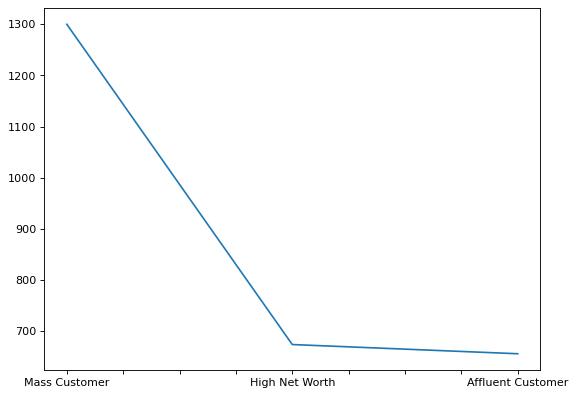

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
customer_demographic['wealth_segment'].value_counts().plot();

#from this plot it seems that most of the customers are 'Mass customers'
#The rest are nearly split equally between the 'High net worth' and 'Affluent' customers 
#with a little bit increase on the 'High net side'

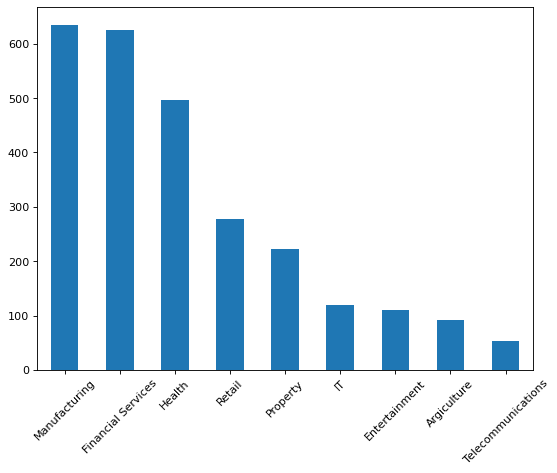

In [13]:
figure(figsize=(8, 6), dpi=80)
customer_demographic['job_industry_category'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 45);

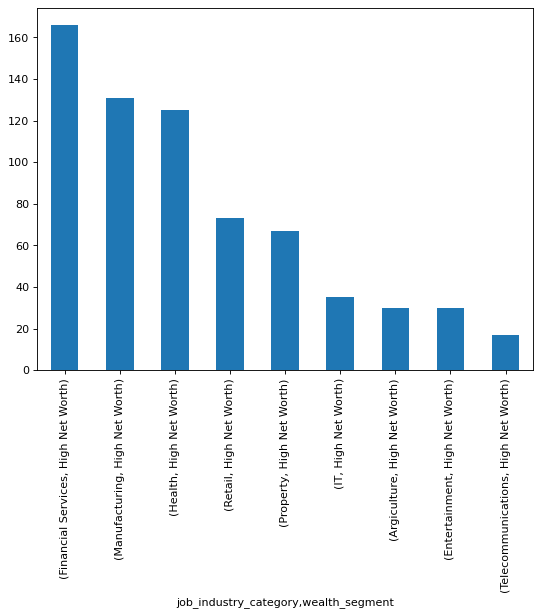

In [14]:
figure(figsize=(8, 6), dpi=80)
jobs = customer_demographic[['job_industry_category', 'wealth_segment']]
jobs[jobs['wealth_segment'] == 'High Net Worth'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 90);

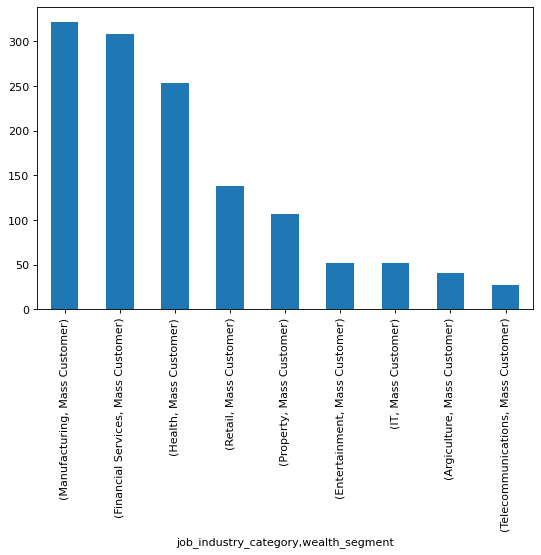

In [15]:
figure(figsize=(8, 5), dpi=80)
jobs[jobs['wealth_segment'] == 'Mass Customer'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 90);

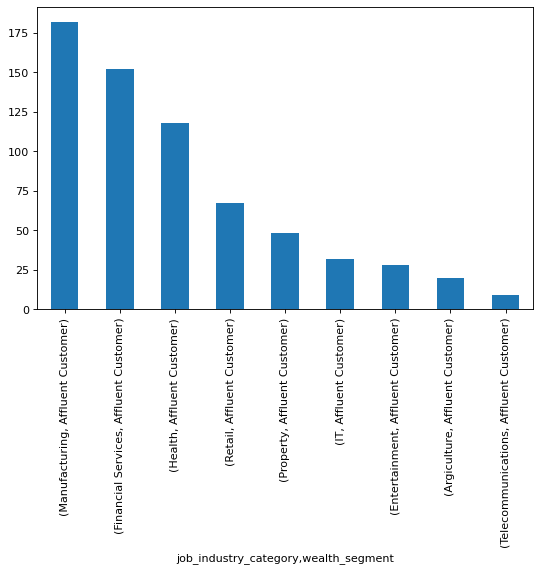

In [16]:
figure(figsize=(8, 5), dpi=80)
jobs[jobs['wealth_segment'] == 'Affluent Customer'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 90);

#### Creating some masks to further explore the data

In [17]:
high_net_worth = customer_demographic[customer_demographic['wealth_segment'] == 'High Net Worth']

In [18]:
high_net_worth.describe(include = object)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment
count,674,674,674,674,674,674
unique,643,670,2,171,9,1
top,Jareb,Coxhell,F,Cost Accountant,Financial Services,High Net Worth
freq,2,2,359,13,166,674


In [19]:
figure(figsize=(8, 5), dpi=80)
high_net_worth[['job_title', 'job_industry_category']].value_counts().head(10)

job_title                job_industry_category
Cost Accountant          Financial Services       13
Dental Hygienist         Health                   12
Electrical Engineer      Manufacturing            11
Chemical Engineer        Manufacturing             9
Paralegal                Financial Services        9
Sales Representative     Retail                    9
Food Chemist             Health                    9
Geological Engineer      Manufacturing             8
Librarian                Entertainment             8
Assistant Media Planner  Entertainment             8
dtype: int64

<Figure size 640x400 with 0 Axes>

In [20]:
mass_customer = customer_demographic[customer_demographic['wealth_segment'] == 'Mass Customer']
mass_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11,68
2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16,40
3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15,67
10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,0,1,20,33
12,Sawyere,Flattman,M,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,0,0,8,27


In [21]:
mass_customer[['job_title', 'job_industry_category']].value_counts().head(10)

job_title                 job_industry_category
Chemical Engineer         Manufacturing            21
Social Worker             Health                   20
Registered Nurse          Health                   18
Research Nurse            Health                   18
Compensation Analyst      Financial Services       17
Pharmacist                Health                   17
VP Accounting             Financial Services       17
Sales Representative      Retail                   17
Senior Financial Analyst  Financial Services       17
Assistant Media Planner   Entertainment            16
dtype: int64

In [22]:
affluent_customer = customer_demographic[customer_demographic['wealth_segment'] == 'Affluent Customer']
affluent_customer[['job_title', 'job_industry_category']].value_counts().head(10)

job_title                 job_industry_category
Social Worker             Health                   11
Sales Representative      Retail                   10
Paralegal                 Financial Services       10
Food Chemist              Health                   10
Registered Nurse          Health                    9
Senior Financial Analyst  Financial Services        9
Nuclear Power Engineer    Manufacturing             9
Research Nurse            Health                    8
Compensation Analyst      Financial Services        8
Librarian                 Entertainment             8
dtype: int64

In [23]:
gender_affluent = affluent_customer.groupby('gender');
gender_affluent.past_3_years_bike_related_purchases.mean()

gender
F    50.101266
M    49.602941
Name: past_3_years_bike_related_purchases, dtype: float64

In [24]:
gendered = customer_demographic.groupby('gender')
gendered.wealth_segment.value_counts()

gender  wealth_segment   
F       Mass Customer        693
        High Net Worth       359
        Affluent Customer    316
M       Mass Customer        607
        Affluent Customer    340
        High Net Worth       315
Name: wealth_segment, dtype: int64

In [25]:
gendered.past_3_years_bike_related_purchases.mean()

gender
F    48.268275
M    50.550713
Name: past_3_years_bike_related_purchases, dtype: float64

In [26]:
gendered.past_3_years_bike_related_purchases.median()

gender
F    48.0
M    49.5
Name: past_3_years_bike_related_purchases, dtype: float64

In [27]:
#This may mean that men in general make more purchases than women but needs further investigation

In [28]:
customer_demographic.groupby(['gender', 'wealth_segment']).past_3_years_bike_related_purchases.median()

gender  wealth_segment   
F       Affluent Customer    50
        High Net Worth       47
        Mass Customer        47
M       Affluent Customer    48
        High Net Worth       47
        Mass Customer        53
Name: past_3_years_bike_related_purchases, dtype: int64

In [29]:
customer_demographic.groupby(['gender', 'wealth_segment']).owns_car.value_counts()

gender  wealth_segment     owns_car
F       Affluent Customer  1           171
                           0           145
        High Net Worth     1           186
                           0           173
        Mass Customer      1           357
                           0           336
M       Affluent Customer  1           183
                           0           157
        High Net Worth     1           165
                           0           150
        Mass Customer      0           308
                           1           299
Name: owns_car, dtype: int64

In [30]:
customer_demographic.groupby(['gender', 'wealth_segment', 'owns_car']).past_3_years_bike_related_purchases.median()
#this is odd as I thought that owning a car would mean that you wouldn't use the bike as much and it actually not that way is for
#the females but for the males the rule does not hold except for the male mass Customers it holds

gender  wealth_segment     owns_car
F       Affluent Customer  0           47.0
                           1           51.0
        High Net Worth     0           46.0
                           1           47.0
        Mass Customer      0           45.5
                           1           49.0
M       Affluent Customer  0           46.0
                           1           49.0
        High Net Worth     0           45.0
                           1           49.0
        Mass Customer      0           54.0
                           1           51.0
Name: past_3_years_bike_related_purchases, dtype: float64

#### From the previous plots it seems like that the bulk of customers are working in the Manufacturing and the Financial services fields 

In [31]:
wealth_segment_gendered = customer_demographic.groupby(['wealth_segment', 'gender'])

In [32]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()

wealth_segment     gender  past_3_years_bike_related_purchases
Affluent Customer  F       16                                     8
                           2                                      7
                           67                                     7
                           76                                     7
                           91                                     7
                                                                 ..
Mass Customer      M       24                                     2
                           49                                     2
                           57                                     2
                           28                                     1
                           71                                     1
Name: past_3_years_bike_related_purchases, Length: 588, dtype: int64

In [33]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()['Affluent Customer']['M'].mean()

3.5416666666666665

In [34]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()['Affluent Customer']['F'].mean()

3.2244897959183674

##### From this we conclude that the mean of the men who are Affluent Customer is higher than the female customers 

In [35]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()['Affluent Customer'].describe()

count    194.000000
mean       3.381443
std        1.669248
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [36]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()['Mass Customer'].describe()

count    200.000000
mean       6.500000
std        2.654284
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       16.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [37]:
wealth_segment_gendered.past_3_years_bike_related_purchases.value_counts()['High Net Worth'].describe()

count    194.000000
mean       3.474227
std        1.841338
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: past_3_years_bike_related_purchases, dtype: float64

### From this we conclude that the 'Mass Customer' category is the highest in purchases for the past 3 years

In [38]:
wealth_gender_jobCat = customer_demographic.groupby(['wealth_segment', 'gender', 'job_industry_category'])
m = wealth_gender_jobCat.past_3_years_bike_related_purchases.value_counts()['Mass Customer']['M']
f = wealth_gender_jobCat.past_3_years_bike_related_purchases.value_counts()['Mass Customer']['F']

In [39]:
#wealth_gender_jobCat.job_industry_category.count()
wealth_gender_jobCat.past_3_years_bike_related_purchases.value_counts()['Mass Customer']

gender  job_industry_category  past_3_years_bike_related_purchases
F       Argiculture            2                                      2
                               7                                      1
                               11                                     1
                               16                                     1
                               22                                     1
                                                                     ..
M       Telecommunications     48                                     1
                               58                                     1
                               85                                     1
                               90                                     1
                               95                                     1
Name: past_3_years_bike_related_purchases, Length: 786, dtype: int64

In [44]:
def means_of_industry(m, industries):
    '''
    takes in the name of the industry and returns the mean
    '''
    means = {}
    mean = 0
    #mean = sum(m[industry].keys() * m[industry].values)/len(m[industry].keys() * m[industry].values)
    for industry in industries:
        mean = sum(m[industry].keys() * m[industry].values)/len(m[industry].keys() * m[industry].values)
        means[industry] = mean
    return means
    

In [45]:
male_means_industry_purchases = {}
male_means_industry_purchases = means_of_industry(m, customer_demographic.job_industry_category.unique())
female_means_industry_purchases = means_of_industry(f, customer_demographic.job_industry_category.unique())

In [47]:
male_means_industry_purchases

{'Health': 97.39682539682539,
 'Financial Services': 95.12048192771084,
 'Property': 67.47058823529412,
 'Argiculture': 71.07142857142857,
 'Manufacturing': 99.09876543209876,
 'Telecommunications': 46.166666666666664,
 'Entertainment': 62.56521739130435,
 'Retail': 75.1891891891892,
 'IT': 65.57692307692308}

In [48]:
female_means_industry_purchases

{'Health': 86.33333333333333,
 'Financial Services': 88.3896103896104,
 'Property': 70.34042553191489,
 'Argiculture': 50.17391304347826,
 'Manufacturing': 98.59036144578313,
 'Telecommunications': 55.416666666666664,
 'Entertainment': 54.523809523809526,
 'Retail': 78.875,
 'IT': 52.8421052631579}

### Now we analyze the transactions dataframe

In [49]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  bool          
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

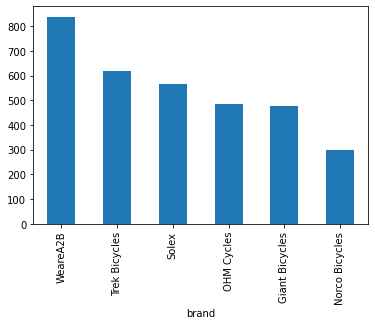

In [50]:
(transactions.groupby('brand').list_price.mean() - transactions.groupby('brand').standard_cost.mean()).sort_values(ascending = False).plot(kind = 'bar',)
plt.xticks(rotation = 90);
#the difference between the listing price mean and the standard cost mean aka. production cost 

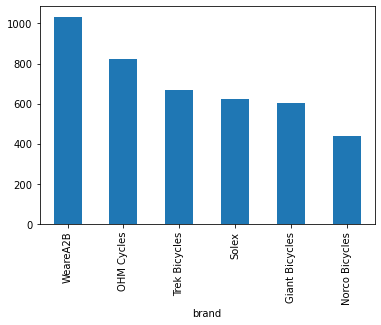

In [51]:
(transactions.groupby('brand').list_price.median() - transactions.groupby('brand').standard_cost.median()).sort_values(ascending = False).plot(kind = 'bar',)
plt.xticks(rotation = 90);

#### This seems odd as the two plots are not the same this might mean that there are some outliers affecting the mean, needs further investigation    

In [52]:
transactions.groupby('brand').list_price.describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3244.0,1235.269547,505.690117,230.91,792.90,1311.44,1635.30,1977.36
Norco Bicycles,2863.0,913.015830,404.282192,360.40,544.05,958.74,1216.14,1661.92
OHM Cycles,2993.0,980.625573,650.854278,12.01,235.63,1073.07,1636.90,2005.66
Solex,4169.0,1055.060134,605.242741,71.49,478.16,1071.23,1577.53,2083.94
Trek Bicycles,2931.0,1185.523374,645.761649,290.62,533.51,1057.51,1775.81,2091.47
WeareA2B,3245.0,1264.303834,546.665957,60.34,1065.03,1292.84,1762.96,1992.93


In [53]:
transactions.groupby('brand').standard_cost.describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3244.0,760.187781,356.521811,173.18,582.48,709.48,954.82,1759.85
Norco Bicycles,2863.0,614.988718,322.165974,206.35,376.84,521.94,795.10,1479.11
OHM Cycles,2993.0,494.971607,482.589323,7.21,101.58,248.82,874.90,1610.90
Solex,4169.0,489.977293,360.156704,53.62,151.96,448.90,675.03,1516.13
Trek Bicycles,2931.0,568.900686,437.542495,154.40,297.43,388.92,598.76,1580.47
WeareA2B,3245.0,426.804394,377.330755,13.44,131.92,260.14,762.63,1259.36


In [54]:
transactions.groupby('brand').list_price.describe() - transactions.groupby('brand').standard_cost.describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,0.0,475.081766,149.168306,57.73,210.42,601.96,680.48,217.51
Norco Bicycles,0.0,298.027111,82.116218,154.05,167.21,436.80,421.04,182.81
OHM Cycles,0.0,485.653966,168.264955,4.80,134.05,824.25,762.00,394.76
Solex,0.0,565.082841,245.086036,17.87,326.20,622.33,902.50,567.81
Trek Bicycles,0.0,616.622689,208.219154,136.22,236.08,668.59,1177.05,511.00
WeareA2B,0.0,837.499439,169.335202,46.90,933.11,1032.70,1000.33,733.57


#### From the previous table it looks legit that its not about outliers only that the mean of 'Trek Bicycles' is only larger than its median while all the rest brands' means are less than its median thats why there is a difference in the plots

In [55]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    bool          
 10  tenure        

In [56]:
new_customer_list.deceased_indicator = [1 if i == 'Y' else 0 for i in new_customer_list.deceased_indicator]

In [57]:
new_customer_list.owns_car = [1 if i == True else 0 for i in new_customer_list.deceased_indicator]

In [58]:
#will drop the country column as all of the rows are Australia
new_customer_list.drop('country', axis = 1, inplace = True)                              

In [59]:
new_customer_list.state.unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [60]:
new_customer_list.state = ['Queensland' if i == 'QLD' else 'New South Wales' if i == 'NSW' else 'Victoria' for i in new_customer_list.state] 
#changed the state column to be the state name instead of the state code

In [61]:
new_customer_list['age_group'] = ['30 or less' if i <= 30 else '50 or less' if i <= 50 
                                      else 'more than 50' for i in new_customer_list.age]                              

In [62]:
new_customer_list.drop('owns_car', inplace = True, axis = 1)
#dropped this column as it only contains 0 values(no one owns cars)  

In [63]:
new_customer_list.drop('deceased_indicator', axis = 1, inplace = True)

In [64]:
#does the state make a difference on the purchases count
new_customer_list.groupby(['state', 'wealth_segment']).past_3_years_bike_related_purchases.describe()

#we can say from this that in general customers coming from New South Wales have higher medians but not that much of a
#difference that we can use to base our decision on

count       mean        std  min    25%  \
state           wealth_segment                                               
New South Wales Affluent Customer   79.0  53.455696  28.319966  0.0  31.00   
                High Net Worth      92.0  50.271739  25.527879  1.0  32.25   
                Mass Customer      181.0  49.618785  28.459396  0.0  25.00   
Queensland      Affluent Customer   43.0  54.534884  25.284429  6.0  40.50   
                High Net Worth      33.0  52.909091  27.703073  3.0  32.00   
                Mass Customer       90.0  49.055556  28.302682  0.0  28.25   
Victoria        Affluent Customer   51.0  45.411765  26.998649  1.0  24.50   
                High Net Worth      55.0  46.690909  26.269876  0.0  22.50   
                Mass Customer       91.0  48.274725  30.006690  0.0  23.50   

                                    50%    75%   max  
state           wealth_segment                        
New South Wales Affluent Customer  60.0  75.00  99.0  
                High Net Worth     53.0  69.25  99.0  
                Mass Customer      51.0  70.00  99.0  
Queensland      Affluent Customer  51.0  74.00  97.0  
                High Net Worth     57.0  73.00  99.0  
                Mass Customer      48.0  73.50  99.0  
Victoria        Affluent Customer  40.0  64.50  99.0  
                High Net Worth     50.0  64.50  99.0  
                Mass Customer      48.0  77.50  98.0

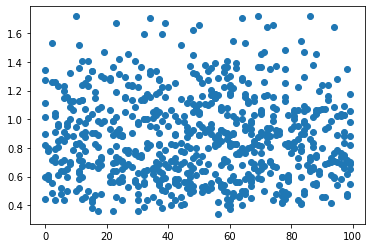

In [65]:
plt.scatter(x = 'past_3_years_bike_related_purchases', y = 'Value', data = new_customer_list)

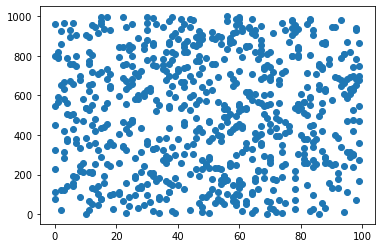

In [66]:
plt.scatter(x = 'past_3_years_bike_related_purchases', y = 'Rank', data = new_customer_list)

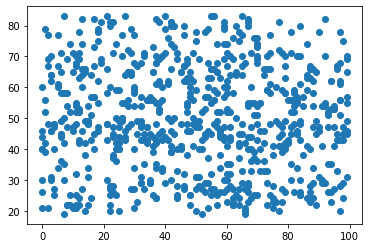

In [67]:
plt.scatter(x = 'past_3_years_bike_related_purchases', y = 'age', data = new_customer_list)

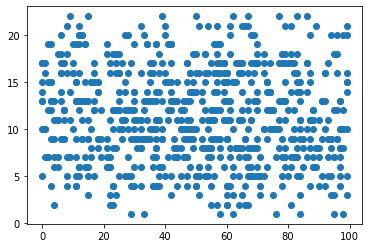

In [68]:
plt.scatter(x = 'past_3_years_bike_related_purchases', y = 'tenure', data = new_customer_list)

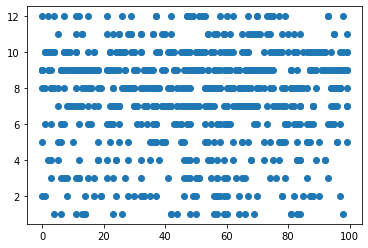

In [69]:
plt.scatter(x = 'past_3_years_bike_related_purchases', y = 'property_valuation', data = new_customer_list)

#### From the past 5 plots we can coclude that there is no correlation between 'value', 'rank', 'property valuation', 'age', 'tenure' and 'past 3 years bike related purchases'

In [70]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,tenure,address,postcode,state,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,14,45 Shopko Center,4500,Queensland,6,1,1.718750,64,more than 50
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,16,14 Mccormick Park,2113,New South Wales,11,1,1.718750,51,more than 50
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,10,5 Colorado Crossing,3505,Victoria,5,1,1.718750,47,50 or less
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,5,207 Annamark Plaza,4814,Queensland,1,4,1.703125,42,50 or less
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,19,115 Montana Place,2093,New South Wales,9,4,1.703125,56,more than 50


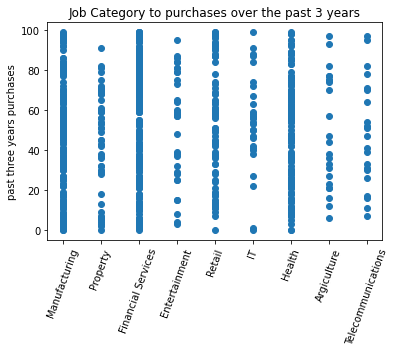

In [91]:
plt.scatter(x = 'job_industry_category', y = 'past_3_years_bike_related_purchases', data = new_customer_list);
plt.xticks(rotation = 70);
plt.ylabel('past three years purchases');
plt.title('Job Category to purchases over the past 3 years');

In [93]:
new_customer_list.groupby(['job_industry_category']).past_3_years_bike_related_purchases.describe()
#the heighest mdian and the third heighest mean is in the Entertainment industry

,count,mean,std,min,25%,50%,75%,max
job_industry_category,,,,,,,,
Argiculture,23.0,49.217391,28.051830,6.0,25.00,44.0,75.00,97.0
Entertainment,32.0,52.187500,27.735429,3.0,28.75,57.5,79.00,95.0
Financial Services,182.0,52.615385,28.830144,0.0,29.25,54.5,77.75,99.0
Health,135.0,47.555556,26.829942,0.0,24.00,47.0,67.00,99.0
IT,29.0,54.206897,23.885709,0.0,42.00,54.0,67.00,99.0
Manufacturing,171.0,47.350877,28.001780,0.0,24.00,48.0,68.50,99.0
Property,49.0,45.081633,25.594463,0.0,29.00,51.0,68.00,91.0
Retail,73.0,53.753425,28.817327,0.0,33.00,56.0,78.00,99.0
Telecommunications,21.0,48.190476,26.910256,7.0,30.00,47.0,70.00,97.0


In [94]:
new_customer_list.groupby(['gender','job_industry_category']).past_3_years_bike_related_purchases.describe()
#In males the heighest mdian and the heighest mean is in the IT industry
#While in females the heighest mdian and the heighest mean is in the Entertainment industry 
#but still there is no clear correlation between the two variables

count       mean        std   min    25%   50%  \
gender job_industry_category                                                   
F      Argiculture              8.0  47.500000  24.622870  21.0  25.50  42.5   
       Entertainment           18.0  54.500000  27.489570   8.0  33.25  58.5   
       Financial Services      92.0  51.945652  28.656113   0.0  28.50  54.0   
       Health                  74.0  48.148649  27.301303   0.0  26.00  45.0   
       IT                      15.0  46.866667  20.815059   0.0  39.00  50.0   
       Manufacturing           85.0  45.117647  29.164726   0.0  18.00  44.0   
       Property                25.0  45.360000  25.772854   0.0  30.00  49.0   
       Retail                  40.0  47.775000  28.899017   0.0  20.50  48.0   
       Telecommunications      12.0  49.166667  26.135428  16.0  29.00  44.0   
M      Argiculture             15.0  50.133333  30.509639   6.0  27.00  44.0   
       Entertainment           14.0  49.214286  28.796844   3.0  28.25  57.0   
       Financial Services      90.0  53.300000  29.151464   1.0  30.50  54.5   
       Health                  61.0  46.836066  26.454477   0.0  23.00  52.0   
       IT                      14.0  62.071429  25.168553   1.0  50.00  62.0   
       Manufacturing           86.0  49.558140  26.790079   0.0  31.25  50.0   
       Property                24.0  44.791667  25.958125   3.0  25.50  51.0   
       Retail                  33.0  61.000000  27.419199  12.0  37.00  61.0   
       Telecommunications       9.0  46.888889  29.459483   7.0  31.00  51.0   

                                75%   max  
gender job_industry_category               
F      Argiculture            74.25  77.0  
       Entertainment          79.00  95.0  
       Financial Services     77.25  99.0  
       Health                 67.75  99.0  
       IT                     57.00  91.0  
       Manufacturing          66.00  99.0  
       Property               69.00  81.0  
       Retail                 67.00  99.0  
       Telecommunications     70.25  97.0  
M      Argiculture            76.00  97.0  
       Entertainment          72.25  87.0  
       Financial Services     77.50  99.0  
       Health                 66.00  98.0  
       IT                     81.50  99.0  
       Manufacturing          69.75  98.0  
       Property               62.00  91.0  
       Retail                 90.00  99.0  
       Telecommunications     64.00  95.0

In [107]:
v = new_customer_list.groupby(['wealth_segment','job_industry_category']).past_3_years_bike_related_purchases.describe()

In [120]:
affluent_customer = v.iloc[:9, :]
affluent_customer

count       mean        std   min  \
wealth_segment    job_industry_category                                      
Affluent Customer Argiculture              5.0  36.000000  23.505319   6.0   
                  Entertainment            4.0  42.000000  25.337719   8.0   
                  Financial Services      48.0  54.291667  27.979444   1.0   
                  Health                  34.0  49.205882  26.909252   7.0   
                  IT                       7.0  58.857143  26.748387  27.0   
                  Manufacturing           41.0  52.487805  28.455335   0.0   
                  Property                12.0  44.083333  25.723913   6.0   
                  Retail                  18.0  54.722222  30.056428   7.0   
                  Telecommunications       4.0  44.750000  15.671099  31.0   

                                          25%   50%    75%   max  
wealth_segment    job_industry_category                           
Affluent Customer Argiculture            27.0  33.0  44.00  70.0  
                  Entertainment          30.5  47.5  59.00  65.0  
                  Financial Services     30.5  54.5  80.25  97.0  
                  Health                 24.0  53.5  67.00  93.0  
                  IT                     41.0  46.0  79.00  99.0  
                  Manufacturing          32.0  56.0  77.00  98.0  
                  Property               29.5  37.5  69.25  82.0  
                  Retail                 35.5  51.0  83.00  99.0  
                  Telecommunications     32.5  42.0  54.25  64.0

In [119]:
high_net_worth = v.iloc[9:18, :]
high_net_worth

count       mean        std   min  \
wealth_segment job_industry_category                                      
High Net Worth Argiculture              2.0  29.500000  12.020815  21.0   
               Entertainment           14.0  45.571429  25.593612   3.0   
               Financial Services      38.0  53.342105  24.262390   3.0   
               Health                  34.0  53.000000  25.761141   5.0   
               IT                       5.0  35.200000  23.101948   1.0   
               Manufacturing           55.0  44.800000  26.279410   2.0   
               Property                11.0  53.181818  20.527144   7.0   
               Retail                  12.0  61.250000  33.355182   0.0   
               Telecommunications       9.0  50.333333  31.096624  11.0   

                                        25%   50%    75%   max  
wealth_segment job_industry_category                            
High Net Worth Argiculture            25.25  29.5  33.75  38.0  
               Entertainment          28.25  48.0  59.75  84.0  
               Financial Services     41.25  59.0  73.00  99.0  
               Health                 31.75  58.5  72.00  99.0  
               IT                     22.00  47.0  50.00  56.0  
               Manufacturing          24.50  46.0  60.50  98.0  
               Property               47.00  59.0  66.50  79.0  
               Retail                 50.00  60.5  94.75  99.0  
               Telecommunications     17.00  54.0  71.00  97.0

In [118]:
mass_customer = v.iloc[18:27, :]
mass_customer

count       mean        std   min  \
wealth_segment job_industry_category                                      
Mass Customer  Argiculture             16.0  55.812500  28.994755  12.0   
               Entertainment           14.0  61.714286  29.229670   4.0   
               Financial Services      96.0  51.489583  31.050382   0.0   
               Health                  67.0  43.955224  27.162492   0.0   
               IT                      17.0  57.882353  21.447268   0.0   
               Manufacturing           75.0  46.413333  28.971138   0.0   
               Property                26.0  42.115385  27.559865   0.0   
               Retail                  43.0  51.255814  27.271207   9.0   
               Telecommunications       8.0  47.500000  29.076254   7.0   

                                        25%   50%    75%   max  
wealth_segment job_industry_category                            
Mass Customer  Argiculture            29.00  65.5  77.00  97.0  
               Entertainment          36.00  76.0  83.25  95.0  
               Financial Services     24.75  51.5  79.50  99.0  
               Health                 24.00  38.0  65.50  98.0  
               IT                     50.00  57.0  67.00  91.0  
               Manufacturing          22.00  49.0  68.50  99.0  
               Property               14.25  48.0  60.00  91.0  
               Retail                 30.50  49.0  73.50  98.0  
               Telecommunications     29.00  44.0  59.50  95.0

#### It looks like that the most profitable customers are of the *'Mass Customer'* wealth segment who work in the *Entertainment* industry as their median purchases sky-rockets at 76